In [2]:
import lief
import os
import networkx as nx
from lief.ELF import DYNAMIC_TAGS

In [6]:
elf = lief.parse("/bin/zoom")
for entr in elf.dynamic_entries:
    print(entr)

NEEDED              1         libpthread.so.0
NEEDED              df        libstdc++.so.6
NEEDED              754       libm.so.6 
NEEDED              75e       libgcc_s.so.1
NEEDED              77b       libc.so.6 
INIT                2ef0      
FINI                289c4     
INIT_ARRAY          2346a0    [0x3d40, 0x3eb0]
INIT_ARRAYSZ        10        
FINI_ARRAY          2346b0    [0x3e70]
FINI_ARRAYSZ        8         
GNU_HASH            298       
STRTAB              1078      
SYMTAB              2e0       
STRSZ               9dd       
SYMENT              18        
DEBUG               0         
PLTGOT              234b80    
PLTRELSZ            ba0       
PLTREL              7         
JMPREL              2350      
RELA                1c48      
RELASZ              708       
RELAENT             18        
BIND_NOW            0         
FLAGS_1             1          NOW
VERNEED             1b78      
VERNEEDNUM          4         
VERSYM              1a56      
RELACOUNT  

In [2]:
root = "/bin/arch-audit"
libs = []
raw_libs = open("libs")
for string in raw_libs:
    start = string.find('>')
    end = string.find('(')
    libs.append(string[start+2:end-1])
libs

['linux-vdso.so.1',
 '/usr/lib/libgtk-3.so.0',
 '/usr/lib/libgdk-3.so.0',
 '/usr/lib/libpangocairo-1.0.so.0',
 '/usr/lib/libpango-1.0.so.0',
 '/usr/lib/libatk-1.0.so.0',
 '/usr/lib/libcairo.so.2',
 '/usr/lib/libgio-2.0.so.0',
 '/usr/lib/libgobject-2.0.so.0',
 '/usr/lib/libglib-2.0.so.0',
 '/usr/lib/libz.so.1',
 '/usr/lib/libpcre2-8.so.0',
 '/usr/lib/libgnutls.so.30',
 '/usr/lib/libstdc++.so.6',
 '/usr/lib/libm.so.6',
 '/usr/lib/libgcc_s.so.1',
 '/usr/lib/libpthread.so.0',
 '/usr/lib/libc.so.6',
 '/usr/lib/libgmodule-2.0.so.0',
 '/usr/lib/libharfbuzz.so.0',
 '/usr/lib/libpangoft2-1.0.so.0',
 '/usr/lib/libfontconfig.so.1',
 '/usr/lib/libfreetype.so.6',
 '/usr/lib/libfribidi.so.0',
 '/usr/lib/libcairo-gobject.so.2',
 '/usr/lib/libgdk_pixbuf-2.0.so.0',
 '/usr/lib/libepoxy.so.0',
 '/usr/lib/libXi.so.6',
 '/usr/lib/libX11.so.6',
 '/usr/lib/libatk-bridge-2.0.so.0',
 '/usr/lib/libcloudproviders.so.0',
 '/usr/lib/libXfixes.so.3',
 '/usr/lib/librt.so.1',
 '/usr/lib/libxkbcommon.so.0',
 '/usr/lib

In [3]:
G = nx.Graph()
for lib in libs:
    G.add_edge(root,lib)
    if lib == "linux-vdso.so.1":
        continue
    elf = lief.parse(lib)
    for entry in elf.dynamic_entries:
        if str(entry)[:6] == "NEEDED":
            path = 'usr/lib' + str(entry)[30:]
            G.add_edge(lib, path)

In [4]:
G.edges

EdgeView([('/bin/arch-audit', 'linux-vdso.so.1'), ('/bin/arch-audit', '/usr/lib/libgtk-3.so.0'), ('/bin/arch-audit', '/usr/lib/libgdk-3.so.0'), ('/bin/arch-audit', '/usr/lib/libpangocairo-1.0.so.0'), ('/bin/arch-audit', '/usr/lib/libpango-1.0.so.0'), ('/bin/arch-audit', '/usr/lib/libatk-1.0.so.0'), ('/bin/arch-audit', '/usr/lib/libcairo.so.2'), ('/bin/arch-audit', '/usr/lib/libgio-2.0.so.0'), ('/bin/arch-audit', '/usr/lib/libgobject-2.0.so.0'), ('/bin/arch-audit', '/usr/lib/libglib-2.0.so.0'), ('/bin/arch-audit', '/usr/lib/libz.so.1'), ('/bin/arch-audit', '/usr/lib/libpcre2-8.so.0'), ('/bin/arch-audit', '/usr/lib/libgnutls.so.30'), ('/bin/arch-audit', '/usr/lib/libstdc++.so.6'), ('/bin/arch-audit', '/usr/lib/libm.so.6'), ('/bin/arch-audit', '/usr/lib/libgcc_s.so.1'), ('/bin/arch-audit', '/usr/lib/libpthread.so.0'), ('/bin/arch-audit', '/usr/lib/libc.so.6'), ('/bin/arch-audit', '/usr/lib/libgmodule-2.0.so.0'), ('/bin/arch-audit', '/usr/lib/libharfbuzz.so.0'), ('/bin/arch-audit', '/usr/l

In [5]:
nx.write_gexf(G,'gephi.gexf',version="1.2draft")

In [1]:
import pygraphviz


In [3]:
G = nx.read_graphml('whole.graphml')

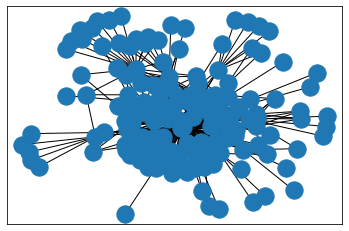

In [8]:
nx.draw_networkx(G, with_labels=False)

In [5]:
nx.nx_agraph.write_dot(G,'whole.dot')

ImportError: requires pygraphviz http://pygraphviz.github.io/